CS 418: Final Project - Regression

Authors: Anusha Sagi, Fatima Kahack, Lydia Tse

Description: In this code, we will be utilizing regression to determine the poverty and child poverty of a specified county


In [1]:
# Load libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import metrics
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import mean_squared_error
import math

In [2]:
# Load Election dataset
data_census = pd.read_csv('train_dp_output.csv')
data_census.head()

,Unnamed: 0,CountyId,State,County,TotalPop,Percent_Women,Hispanic,White,Black,Income,...,WorkAtHome,MeanCommute,PrivateWork,PublicWork,SelfEmployed,Unemployment,Poverty,ChildPoverty,Poverty Category,Child_Poverty Category
0,0,1001,Alabama,Autauga County,55036.0,51.124718,2.7,75.4,18.9,55317,...,2.5,25.8,74.1,20.2,5.6,5.2,13.7,20.1,0,0
1,1,1003,Alabama,Baldwin County,203360.0,51.058714,4.4,83.1,9.5,52562,...,5.6,27.0,80.7,12.9,6.3,5.5,11.8,16.1,0,0
2,2,1007,Alabama,Bibb County,22580.0,45.744021,2.4,74.6,22.0,43404,...,1.5,30.0,76.0,17.4,6.3,8.2,15.2,26.6,0,1
3,3,1009,Alabama,Blount County,57667.0,50.595661,9.0,87.4,1.5,47412,...,2.1,35.0,83.9,11.9,4.0,4.9,15.6,25.4,0,1
4,4,1011,Alabama,Bullock County,10478.0,46.401985,0.3,21.6,75.6,29655,...,3.0,29.8,81.4,13.6,5.0,12.1,28.5,50.4,1,1


In [3]:
#Remove unnamed first column
data_census = data_census.loc[:, ~data_census.columns.str.contains('^Unnamed')]
data_census.head()

,CountyId,State,County,TotalPop,Percent_Women,Hispanic,White,Black,Income,IncomePerCap,...,WorkAtHome,MeanCommute,PrivateWork,PublicWork,SelfEmployed,Unemployment,Poverty,ChildPoverty,Poverty Category,Child_Poverty Category
0,1001,Alabama,Autauga County,55036.0,51.124718,2.7,75.4,18.9,55317,27824,...,2.5,25.8,74.1,20.2,5.6,5.2,13.7,20.1,0,0
1,1003,Alabama,Baldwin County,203360.0,51.058714,4.4,83.1,9.5,52562,29364,...,5.6,27.0,80.7,12.9,6.3,5.5,11.8,16.1,0,0
2,1007,Alabama,Bibb County,22580.0,45.744021,2.4,74.6,22.0,43404,20911,...,1.5,30.0,76.0,17.4,6.3,8.2,15.2,26.6,0,1
3,1009,Alabama,Blount County,57667.0,50.595661,9.0,87.4,1.5,47412,22021,...,2.1,35.0,83.9,11.9,4.0,4.9,15.6,25.4,0,1
4,1011,Alabama,Bullock County,10478.0,46.401985,0.3,21.6,75.6,29655,20856,...,3.0,29.8,81.4,13.6,5.0,12.1,28.5,50.4,1,1


In [4]:
x_train_full, x_validation_full, y_train, y_validation = train_test_split(data_census[['CountyId', 'State', 'County', 'TotalPop', 'Percent_Women', 'Hispanic', 'White', 'Black', 'Income', 'IncomePerCap', 'Professional', 'Service', 'Production', 'Carpool', 'WorkAtHome', 'PrivateWork', 'PublicWork', 'SelfEmployed', 'Unemployment','Poverty','ChildPoverty']], data_census['Poverty Category'], test_size = 0.25, random_state = 0)

In [5]:
# Selecting required variables for x_train
x_train = x_train_full.select_dtypes(include=[np.int64,np.float64])
x_train = x_train.iloc[:,1:17]

# Selecting required variables for x_validation
x_validation = x_validation_full.select_dtypes(include=[np.int64,np.float64])
x_validation = x_validation.iloc[:,1:17]

# Standardizing the data
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_validation_scaled = scaler.transform(x_validation)
x_train_scaled_df = pd.DataFrame(x_train_scaled,index = x_train.index,columns=x_train.columns)
x_validation_scaled_df = pd.DataFrame(x_validation_scaled,index = x_validation.index,columns=x_validation.columns)

In [6]:
x_train_scaled_df.head()

,TotalPop,Percent_Women,Hispanic,White,Black,Income,IncomePerCap,Professional,Service,Production,Carpool,WorkAtHome,PrivateWork,PublicWork,SelfEmployed,Unemployment
1380,-0.118525,0.045865,-0.424669,0.689223,-0.436854,0.351729,0.262281,-0.089405,0.020679,0.311605,-0.525450,-0.722745,0.273757,0.070351,-0.627322,-0.399510
712,-0.204940,0.230015,-0.377088,0.737585,-0.534862,0.566678,0.567576,0.684500,-0.272313,0.465626,-0.828094,-0.486424,0.430169,-0.701345,0.233632,-1.099195
31,0.737568,0.484634,-0.340081,-0.436288,1.075267,0.889286,1.285452,2.232309,-0.778390,-0.903448,-1.197992,-0.452664,0.195551,0.306584,-0.855222,-0.022756
1969,-0.095083,0.500355,0.082856,-0.493443,0.886252,-0.045923,-0.098784,0.123039,-0.591940,0.380059,-1.164364,-0.317624,0.795131,-0.669847,-0.450067,0.165621
655,-0.010013,-0.916455,-0.414095,0.416639,-0.471857,0.251228,0.246021,2.293007,-0.219042,-1.091695,-1.231619,0.087498,-1.146986,1.928721,-0.804578,-0.587887


In [7]:
x_validation_scaled_df.head()

,TotalPop,Percent_Women,Hispanic,White,Black,Income,IncomePerCap,Professional,Service,Production,Carpool,WorkAtHome,PrivateWork,PublicWork,SelfEmployed,Unemployment
2054,-0.266679,-1.052672,1.690019,-1.210077,-0.205836,-0.839971,-1.047797,-0.195627,0.287036,-0.184684,-0.794467,-0.081303,-0.351891,-0.276125,1.170553,-0.184222
743,-0.271908,-0.538295,1.272368,-0.572580,-0.597867,0.607557,-0.164433,0.214087,-1.843815,0.499853,0.819632,-0.283863,-0.404029,-0.354869,1.423774,-0.560976
2298,-0.104267,-0.877347,-0.498683,0.829912,-0.513861,0.440793,0.189490,-0.241151,-0.378855,1.030369,-0.491823,0.425100,0.912440,-1.047821,-0.120879,-0.776263
1534,0.802903,0.416973,-0.350655,0.315519,-0.058824,0.953482,0.603591,1.048690,-0.432127,-0.338705,-0.760840,-0.182583,1.342573,-1.016323,-0.931188,-0.318777
1841,-0.213595,0.389020,-0.466963,0.746378,-0.345847,-0.750760,-0.371559,-1.121278,0.260400,1.150163,-1.298873,1.235343,-0.390994,-0.039891,0.841364,0.784573


REGRESSION - PREDICTING POVERTY

[Text(0, 0.5, 'Poverty'),
 Text(0.5, 0, 'White'),
 Text(0.5, 1.0, 'Poverty by White')]

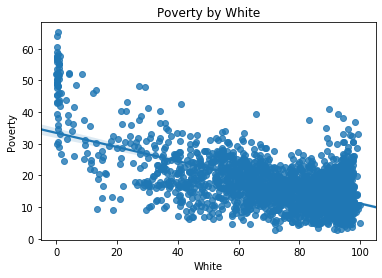

In [8]:
# Plot scatter plot
ax = sns.regplot(data_census['White'], data_census['Poverty'])
ax.set(title = 'Poverty by White', xlabel = 'White', ylabel = 'Poverty')

[Text(0, 0.5, 'Poverty'),
 Text(0.5, 0, 'Hispanic'),
 Text(0.5, 1.0, 'Poverty by Hispanic')]

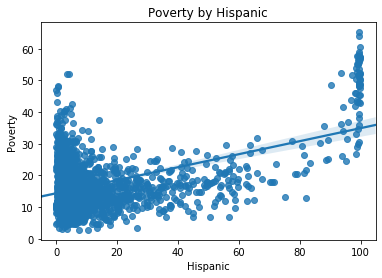

In [9]:
# Plot scatter plot
ax = sns.regplot(data_census['Hispanic'], data_census['Poverty'])
ax.set(title = 'Poverty by Hispanic', xlabel = 'Hispanic', ylabel = 'Poverty')

[Text(0, 0.5, 'Poverty'),
 Text(0.5, 0, 'Income'),
 Text(0.5, 1.0, 'Poverty by Income')]

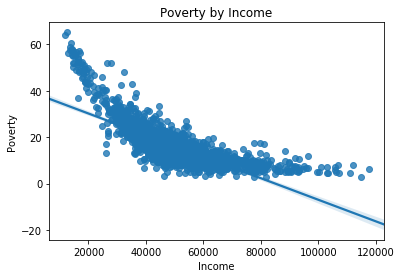

In [10]:
# Plot scatter plot
ax = sns.regplot(data_census['Income'], data_census['Poverty'])
ax.set(title = 'Poverty by Income', xlabel = 'Income', ylabel = 'Poverty')

[Text(0, 0.5, 'Poverty'),
 Text(0.5, 0, 'IncomePerCap'),
 Text(0.5, 1.0, 'Poverty by IncomePerCap')]

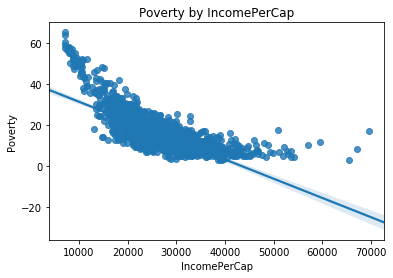

In [11]:
# Plot scatter plot
ax = sns.regplot(data_census['IncomePerCap'], data_census['Poverty'])
ax.set(title = 'Poverty by IncomePerCap', xlabel = 'IncomePerCap', ylabel = 'Poverty')

[Text(0, 0.5, 'Poverty'),
 Text(0.5, 0, 'Professional'),
 Text(0.5, 1.0, 'Poverty by Professional')]

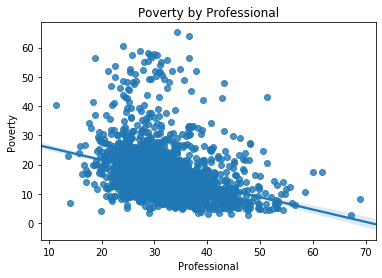

In [12]:
# Plot scatter plot
ax = sns.regplot(data_census['Professional'], data_census['Poverty'])
ax.set(title = 'Poverty by Professional', xlabel = 'Professional', ylabel = 'Poverty')

[Text(0, 0.5, 'Poverty'),
 Text(0.5, 0, 'Production'),
 Text(0.5, 1.0, 'Poverty by Production')]

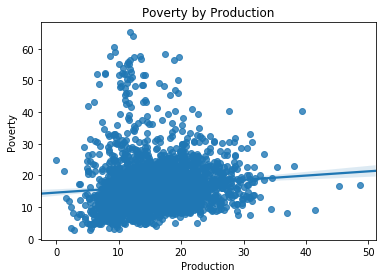

In [13]:
# Plot scatter plot
ax = sns.regplot(data_census['Production'], data_census['Poverty'])
ax.set(title = 'Poverty by Production', xlabel = 'Production', ylabel = 'Poverty')

[Text(0, 0.5, 'Poverty'),
 Text(0.5, 0, 'Unemployment'),
 Text(0.5, 1.0, 'Poverty by Unemployment')]

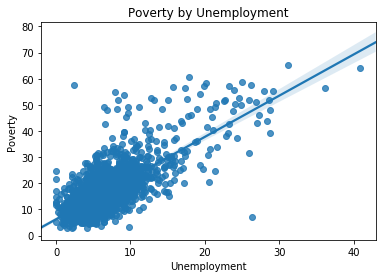

In [14]:
# Plot scatter plot
ax = sns.regplot(data_census['Unemployment'], data_census['Poverty'])
ax.set(title = 'Poverty by Unemployment', xlabel = 'Unemployment', ylabel = 'Poverty')

Model 1 - Poverty - Including all variables

In [15]:
# Create the linear regression model
model = linear_model.LinearRegression()
fitted_model = model.fit(X = x_train_scaled_df, y = x_train_full['Poverty'])
print(fitted_model.coef_)

[-0.05521991  0.5248399   0.21762343 -2.37039385 -0.62024317 -4.22871821
 -1.19391616  1.75855918  0.37486429  0.65621463 -0.11628558 -0.06142195
  0.32942775  0.52436081 -0.43542048  1.84329435]


In [16]:
# Predict the values
y_predicted = fitted_model.predict(x_validation_scaled_df)

In [17]:
# Determining values to calculate evaluation metrics
n = len(x_validation_scaled_df.index)
p = len(x_train_scaled_df.columns)
print(n)
print(p)
print(n-p-1)

607
16
590


In [18]:
# Generating Evaluation metrics
corr_coef = np.corrcoef(y_predicted,x_validation_full['Poverty'])[1, 0]

R_squared = corr_coef ** 2
print("R squared:",R_squared)

adjusted_r = 1 - (((1-R_squared)*(n-1))/(n-p-1))
print("Adjusted R squared:",adjusted_r)

rmse = math.sqrt(mean_squared_error(y_predicted, x_validation_full['Poverty']))
print('RMSE -',rmse)

R squared: 0.8513298077255884
Adjusted R squared: 0.8472980736978077
RMSE - 3.4209848294802594


In [19]:
#Evaluate model with all predictors
score_train = model.score(X = x_train_scaled_df, y = x_train_full['Poverty']) # R squared (training)
score_val = model.score(X = x_validation_scaled_df, y = x_validation_full['Poverty']) # R squared (validation)
print([score_train, score_val])

[0.8272983071536646, 0.8504796157247451]


Model 2 - Poverty - LASSO Regression

In [20]:
# Generating model
model = linear_model.Lasso(alpha = 1)
fitted_model = model.fit(X = x_train_scaled_df, y = x_train_full['Poverty'])
print(fitted_model.coef_)

[ 0.          0.          0.         -1.82929859  0.         -3.41317623
 -0.34644058  0.          0.         -0.         -0.         -0.
 -0.          0.         -0.          1.86348561]


In [21]:
# Predict the values
y_predicted = fitted_model.predict(x_validation_scaled_df)

In [22]:
# Determining values to calculate evaluation metrics
n = len(x_validation_scaled_df.index)
p = len(x_validation_scaled_df.columns)
n-p-1
print(n)
print(p)
print(n-p-1)

607
16
590


In [23]:
# Generating Evaluation metrics
corr_coef = np.corrcoef(y_predicted,x_validation_full['Poverty'])[1, 0]

R_squared = corr_coef ** 2
print("R squared:",R_squared)

adjusted_r = 1 - (((1-R_squared)*(n-1))/(n-p-1))
print("Adjusted R squared:",adjusted_r)

rmse = math.sqrt(mean_squared_error(y_predicted, x_validation_full['Poverty']))
print('RMSE: ',rmse)

R squared: 0.8336599709647284
Adjusted R squared: 0.829149054923094
RMSE:  3.9933497011553434


Model 3 - Poverty - Includes: 'Percent_Women', 'White', 'Income', 'IncomePerCap', 'Professional', 'Unemployment'

In [24]:
# Generating model
model = linear_model.LinearRegression()
fitted_model = model.fit(X = x_train_scaled_df[['Percent_Women', 'White', 'Income', 'IncomePerCap', 'Professional', 'Unemployment']], y = x_train_full['Poverty'])
print(fitted_model.coef_)

[ 0.54355202 -2.28065951 -3.71926111 -1.64630369  1.21432919  2.05606681]


In [25]:
# Predict the values
y_predicted = fitted_model.predict(x_validation_scaled_df[['Percent_Women', 'White', 'Income', 'IncomePerCap', 'Professional', 'Unemployment']])

In [26]:
# Determining values to calculate evaluation metrics
n = len(x_validation_scaled_df.index)
p = len(x_train_scaled_df[['Percent_Women', 'White', 'Income', 'IncomePerCap', 'Professional', 'Unemployment']].columns)
n-p-1
print(n)
print(p)
print(n-p-1)

607
6
600


In [27]:
# Generating Evaluation metrics
corr_coef = np.corrcoef(y_predicted,x_validation_full['Poverty'])[1, 0]
R_squared = corr_coef ** 2
print("R squared:",R_squared)

adjusted_r = 1 - (((1-R_squared)*(n-1))/(n-p-1))
print("Adjusted R squared:",adjusted_r)

rmse = math.sqrt(mean_squared_error(y_predicted, x_validation_full['Poverty']))
print('RMSE: ',rmse)

R squared: 0.8471259545707236
Adjusted R squared: 0.8455972141164309
RMSE:  3.473878047933116


Model 4. Linear Regression - (BEST MODEL) Includes: 'Hispanic', 'White', 'Income', 'IncomePerCap', 'Professional', 'Production', 'Unemployment'

In [28]:
# Generating model
model = linear_model.LinearRegression()
fitted_model_poverty = model.fit(X = x_train_scaled_df[['Hispanic', 'White', 'Income', 'IncomePerCap', 'Professional', 'Production', 'Unemployment']], y = x_train_full['Poverty'])
print(fitted_model.coef_)

[ 0.54355202 -2.28065951 -3.71926111 -1.64630369  1.21432919  2.05606681]


In [29]:
# Predict the values
y_predicted = fitted_model_poverty.predict(x_validation_scaled_df[['Hispanic', 'White', 'Income', 'IncomePerCap', 'Professional', 'Production', 'Unemployment']])

In [30]:
# Determining values to calculate evaluation metrics
n = len(x_validation_scaled_df.index)
p = len(x_train_scaled_df[['Hispanic', 'White', 'Income', 'IncomePerCap', 'Professional', 'Production', 'Unemployment']].columns)
n-p-1
print(n)
print(p)
print(n-p-1)

607
7
599


In [31]:
# Generating Evaluation metrics
corr_coef = np.corrcoef(y_predicted,x_validation_full['Poverty'])[1, 0]
R_squared = corr_coef ** 2
print("R squared:",R_squared)

adjusted_r = 1 - (((1-R_squared)*(n-1))/(n-p-1))
print("Adjusted R squared:",adjusted_r)

rmse = math.sqrt(mean_squared_error(y_predicted, x_validation_full['Poverty']))
print('RMSE: ',rmse)

R squared: 0.851443310856924
Adjusted R squared: 0.8497072560589248
RMSE:  3.422593507053814


In [32]:
#Evaluate model with above predictors
score_train = model.score(X = x_train_scaled_df[['Hispanic', 'White', 'Income', 'IncomePerCap', 'Professional', 'Production', 'Unemployment']], y = x_train_full['Poverty']) # R squared (training)
score_val = model.score(X = x_validation_scaled_df[['Hispanic', 'White', 'Income', 'IncomePerCap', 'Professional', 'Production', 'Unemployment']], y = x_validation_full['Poverty']) # R squared (validation)
print([score_train, score_val])

[0.8142781696578959, 0.8503389622847699]


Model 5 - Poverty - Includes: 'Percent_Women', 'Hispanic', 'White', 'Black', 'Income', 'IncomePerCap', 'Unemployment'

In [33]:
# Generating model
model = linear_model.LinearRegression()
fitted_model = model.fit(X = x_train_scaled_df[['Percent_Women', 'Hispanic', 'White', 'Black', 'Income', 'IncomePerCap', 'Unemployment'
]], y = x_train_full['Poverty'])
print(fitted_model.coef_)

[ 0.64364625 -0.30240318 -2.99304925 -0.7419177  -3.8865889  -0.69936745
  2.06843827]


In [34]:
# Predict the values
y_predicted = fitted_model.predict(x_validation_scaled_df[['Percent_Women', 'Hispanic', 'White', 'Black', 'Income', 'IncomePerCap', 'Unemployment']])

In [35]:
# Determining values to calculate evaluation metrics
n = len(x_validation_scaled_df.index)
p = len(x_train_scaled_df[['Percent_Women', 'Hispanic', 'White', 'Black', 'Income', 'IncomePerCap', 'Unemployment']].columns)
n-p-1
print(n)
print(p)
print(n-p-1)

607
7
599


In [36]:
# Generating Evaluation metrics
corr_coef = np.corrcoef(y_predicted,x_validation_full['Poverty'])[1, 0]
R_squared = corr_coef ** 2
print("R squared:",R_squared)

adjusted_r = 1 - (((1-R_squared)*(n-1))/(n-p-1))
print("Adjusted R squared:",adjusted_r)

rmse = math.sqrt(mean_squared_error(y_predicted, x_validation_full['Poverty']))
print('RMSE: ',rmse)

R squared: 0.833280730505654
Adjusted R squared: 0.8313324251860206
RMSE:  3.626887234067272


REGRESSION - PREDICTING CHILD POVERTY

[Text(0, 0.5, 'ChildPoverty'),
 Text(0.5, 0, 'Hispanic'),
 Text(0.5, 1.0, 'Child Poverty by Hispanic')]

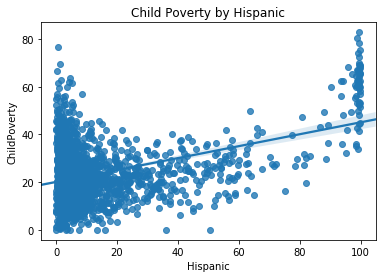

In [37]:
# Plot scatter plot
ax = sns.regplot(data_census['Hispanic'], data_census['ChildPoverty'])
ax.set(title = 'Child Poverty by Hispanic', xlabel = 'Hispanic', ylabel = 'ChildPoverty')

[Text(0, 0.5, 'ChildPoverty'),
 Text(0.5, 0, 'Percent_Women'),
 Text(0.5, 1.0, 'Child Poverty by Percent_Women')]

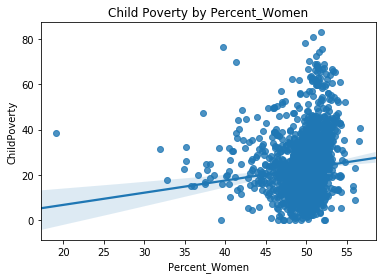

In [38]:
# Plot scatter plot
ax = sns.regplot(data_census['Percent_Women'], data_census['ChildPoverty'])
ax.set(title = 'Child Poverty by Percent_Women', xlabel = 'Percent_Women', ylabel = 'ChildPoverty')

[Text(0, 0.5, 'ChildPoverty'),
 Text(0.5, 0, 'White'),
 Text(0.5, 1.0, 'Child Poverty by White')]

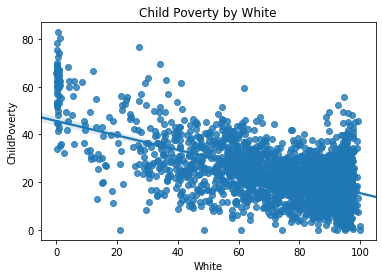

In [39]:
# Plot scatter plot
ax = sns.regplot(data_census['White'], data_census['ChildPoverty'])
ax.set(title = 'Child Poverty by White', xlabel = 'White', ylabel = 'ChildPoverty')

[Text(0, 0.5, 'ChildPoverty'),
 Text(0.5, 0, 'Income'),
 Text(0.5, 1.0, 'Child Poverty by Income')]

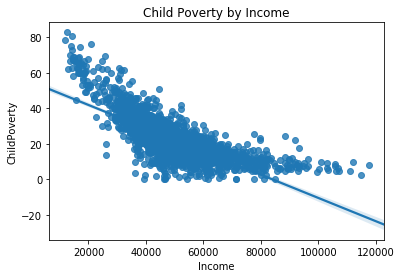

In [40]:
# Plot scatter plot
ax = sns.regplot(data_census['Income'], data_census['ChildPoverty'])
ax.set(title = 'Child Poverty by Income', xlabel = 'Income', ylabel = 'ChildPoverty')

[Text(0, 0.5, 'ChildPoverty'),
 Text(0.5, 0, 'IncomePerCap'),
 Text(0.5, 1.0, 'Child Poverty by IncomePerCap')]

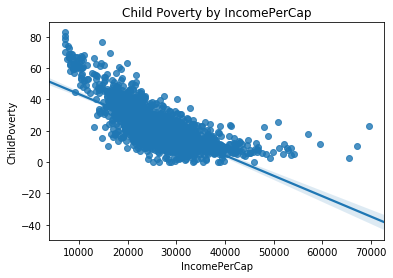

In [41]:
# Plot scatter plot
ax = sns.regplot(data_census['IncomePerCap'], data_census['ChildPoverty'])
ax.set(title = 'Child Poverty by IncomePerCap', xlabel = 'IncomePerCap', ylabel = 'ChildPoverty')

[Text(0, 0.5, 'ChildPoverty'),
 Text(0.5, 0, 'SelfEmployed'),
 Text(0.5, 1.0, 'Child Poverty by SelfEmployed')]

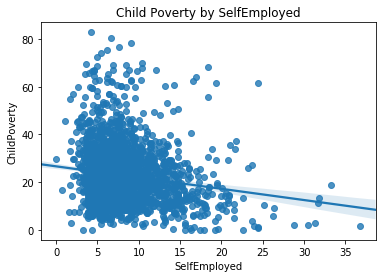

In [42]:
# Plot scatter plot
ax = sns.regplot(data_census['SelfEmployed'], data_census['ChildPoverty'])
ax.set(title = 'Child Poverty by SelfEmployed', xlabel = 'SelfEmployed', ylabel = 'ChildPoverty')

[Text(0, 0.5, 'ChildPoverty'),
 Text(0.5, 0, 'Unemployment'),
 Text(0.5, 1.0, 'Child Poverty by Unemployment')]

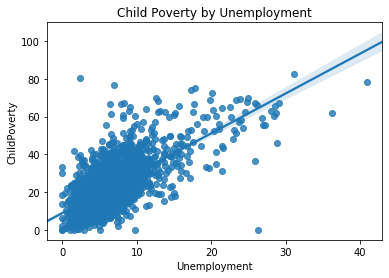

In [44]:
# Plot scatter plot
ax = sns.regplot(data_census['Unemployment'], data_census['ChildPoverty'])
ax.set(title = 'Child Poverty by Unemployment', xlabel = 'Unemployment', ylabel = 'ChildPoverty')

Model 1 - Child poverty - All variables

In [45]:
# Generating model
model = linear_model.LinearRegression()
fitted_model = model.fit(X = x_train_scaled_df, y = x_train_full['ChildPoverty'])
print(fitted_model.coef_)

[ 0.06877829  0.53344814 -0.28921513 -3.69419934 -0.04516057 -6.57441374
 -0.23857924  0.22545993 -0.04384931  0.23054347  0.00771652  0.12998892
  5.07497383  3.95159524  1.77511433  2.36696767]


In [46]:
# Predict the values
y_predicted = fitted_model.predict(x_validation_scaled_df)

In [47]:
# Determining values to calculate evaluation metrics
n = len(x_validation_scaled_df.index)
p = len(x_train_scaled_df.columns)
n-p-1
print(n)
print(p)
print(n-p-1)

607
16
590


In [48]:
# Generating Evaluation metrics
corr_coef = np.corrcoef(y_predicted,x_validation_full['ChildPoverty'])[1, 0]
R_squared = corr_coef ** 2
print("R squared:",R_squared)

adjusted_r = 1 - (((1-R_squared)*(n-1))/(n-p-1))
print("Adjusted R squared:",adjusted_r)

rmse = math.sqrt(mean_squared_error(y_predicted, x_validation_full['ChildPoverty']))
print('RMSE: ',rmse)

R squared: 0.7725131347267584
Adjusted R squared: 0.7663439993973146
RMSE:  5.989999440186332


Model 2 - Child Poverty - LASSO Regression

In [49]:
# Generating model
model = linear_model.Lasso(alpha = 1)
fitted_model = model.fit(X = x_train_scaled_df, y = x_train_full['ChildPoverty'])
print(fitted_model.coef_)

[ 0.          0.          0.         -2.81472074  0.         -5.66498538
 -0.1058546  -0.          0.          0.          0.         -0.
  0.          0.         -0.05624678  2.32627694]


In [50]:
# Predict the values
y_predicted = fitted_model.predict(x_validation_scaled_df)

In [51]:
# Determining values to calculate evaluation metrics
n = len(x_validation_scaled_df.index)
p = len(x_validation_scaled_df.columns)
n-p-1
print(n)
print(p)
print(n-p-1)

607
16
590


In [52]:
# Generating Evaluation metrics
corr_coef = np.corrcoef(y_predicted,x_validation_full['ChildPoverty'])[1, 0]

R_squared = corr_coef ** 2
print("R squared:",R_squared)

adjusted_r = 1 - (((1-R_squared)*(n-1))/(n-p-1))
print("Adjusted R squared:",adjusted_r)

rmse = math.sqrt(mean_squared_error(y_predicted, x_validation_full['ChildPoverty']))
print('RMSE: ',rmse)

R squared: 0.7680747760798697
Adjusted R squared: 0.7617852784820357
RMSE:  6.264814834157485


Model 3 - Child Poverty - (BEST MODEL) Includes: 'Percent_Women', 'Hispanic', 'White', 'Income', 'IncomePerCap', 'SelfEmployed', 'Unemployment'

In [53]:
# Generating model
model = linear_model.LinearRegression()
fitted_model_childPoverty = model.fit(X = x_train_scaled_df[['Percent_Women', 'Hispanic', 'White', 'Income', 'IncomePerCap', 'SelfEmployed', 'Unemployment']], y = x_train_full['ChildPoverty'])
print(fitted_model.coef_)

[ 0.          0.          0.         -2.81472074  0.         -5.66498538
 -0.1058546  -0.          0.          0.          0.         -0.
  0.          0.         -0.05624678  2.32627694]


In [54]:
# Predict the values
y_predicted = fitted_model_childPoverty.predict(x_validation_scaled_df[['Percent_Women', 'Hispanic', 'White', 'Income', 'IncomePerCap', 'SelfEmployed', 'Unemployment']])

In [55]:
# Determining values to calculate evaluation metrics
n = len(x_validation_scaled_df.index)
p = len(x_train_scaled_df[['Percent_Women', 'Hispanic', 'White', 'Income', 'IncomePerCap', 'SelfEmployed', 'Unemployment']].columns)
n-p-1
print(n)
print(p)
print(n-p-1)

607
7
599


In [56]:
# Generating Evaluation metrics
corr_coef = np.corrcoef(y_predicted,x_validation_full['ChildPoverty'])[1, 0]
R_squared = corr_coef ** 2
print("R squared:",R_squared)

adjusted_r = 1 - (((1-R_squared)*(n-1))/(n-p-1))
print("Adjusted R squared:",adjusted_r)

rmse = math.sqrt(mean_squared_error(y_predicted, x_validation_full['ChildPoverty']))
print('RMSE: ',rmse)

R squared: 0.7724443465917777
Adjusted R squared: 0.7697850985552877
RMSE:  5.992641178686747


PREDICT VALUES FOR TEST - LINEAR REGRESSION

In [57]:
# Load Census test dataset
test_census = pd.read_csv('test_dp_output.csv')
test_census.head()

,Unnamed: 0,CountyId,State,County,TotalPop,Percent_Women,Hispanic,White,Black,Income,...,Professional,Service,Production,Carpool,WorkAtHome,MeanCommute,PrivateWork,PublicWork,SelfEmployed,Unemployment
0,0,1005,Alabama,Barbour County,26201.0,46.658524,4.2,45.7,47.8,33368,...,25.0,16.8,24.1,11.1,1.3,23.4,74.1,19.1,6.5,12.4
1,1,1025,Alabama,Clarke County,24625.0,52.694416,0.2,53.0,45.7,33827,...,21.6,14.3,25.6,11.9,0.9,23.9,83.1,11.8,5.1,15.2
2,2,1037,Alabama,Coosa County,10955.0,50.031949,0.1,65.3,33.2,34792,...,17.6,23.2,20.9,9.7,4.2,29.8,78.8,15.9,5.4,11.3
3,3,1047,Alabama,Dallas County,40755.0,53.848608,1.0,27.7,70.2,30065,...,26.7,18.2,25.3,8.9,1.2,22.1,78.8,15.2,5.6,13.7
4,4,1053,Alabama,Escambia County,37621.0,48.629755,2.2,60.2,32.2,35026,...,24.6,21.2,18.3,7.0,0.8,22.6,75.6,19.7,4.6,13.7


In [58]:
#Remove unnamed first column
test_census = test_census.loc[:, ~test_census.columns.str.contains('^Unnamed')]
test_census.head()

,CountyId,State,County,TotalPop,Percent_Women,Hispanic,White,Black,Income,IncomePerCap,Professional,Service,Production,Carpool,WorkAtHome,MeanCommute,PrivateWork,PublicWork,SelfEmployed,Unemployment
0,1005,Alabama,Barbour County,26201.0,46.658524,4.2,45.7,47.8,33368,17561,25.0,16.8,24.1,11.1,1.3,23.4,74.1,19.1,6.5,12.4
1,1025,Alabama,Clarke County,24625.0,52.694416,0.2,53.0,45.7,33827,20765,21.6,14.3,25.6,11.9,0.9,23.9,83.1,11.8,5.1,15.2
2,1037,Alabama,Coosa County,10955.0,50.031949,0.1,65.3,33.2,34792,20342,17.6,23.2,20.9,9.7,4.2,29.8,78.8,15.9,5.4,11.3
3,1047,Alabama,Dallas County,40755.0,53.848608,1.0,27.7,70.2,30065,18248,26.7,18.2,25.3,8.9,1.2,22.1,78.8,15.2,5.6,13.7
4,1053,Alabama,Escambia County,37621.0,48.629755,2.2,60.2,32.2,35026,18164,24.6,21.2,18.3,7.0,0.8,22.6,75.6,19.7,4.6,13.7


In [59]:
test_census = test_census[['CountyId', 'State', 'County', 'TotalPop', 'Percent_Women', 'Hispanic', 'White', 'Black', 'Income', 'IncomePerCap', 'Professional', 'Service', 'Production', 'Carpool', 'WorkAtHome', 'PrivateWork', 'PublicWork', 'SelfEmployed', 'Unemployment']]
test_census.head()

,CountyId,State,County,TotalPop,Percent_Women,Hispanic,White,Black,Income,IncomePerCap,Professional,Service,Production,Carpool,WorkAtHome,PrivateWork,PublicWork,SelfEmployed,Unemployment
0,1005,Alabama,Barbour County,26201.0,46.658524,4.2,45.7,47.8,33368,17561,25.0,16.8,24.1,11.1,1.3,74.1,19.1,6.5,12.4
1,1025,Alabama,Clarke County,24625.0,52.694416,0.2,53.0,45.7,33827,20765,21.6,14.3,25.6,11.9,0.9,83.1,11.8,5.1,15.2
2,1037,Alabama,Coosa County,10955.0,50.031949,0.1,65.3,33.2,34792,20342,17.6,23.2,20.9,9.7,4.2,78.8,15.9,5.4,11.3
3,1047,Alabama,Dallas County,40755.0,53.848608,1.0,27.7,70.2,30065,18248,26.7,18.2,25.3,8.9,1.2,78.8,15.2,5.6,13.7
4,1053,Alabama,Escambia County,37621.0,48.629755,2.2,60.2,32.2,35026,18164,24.6,21.2,18.3,7.0,0.8,75.6,19.7,4.6,13.7


In [60]:
x_test = test_census.select_dtypes(include=[np.int64,np.float64])
x_test = x_test.iloc[:,1:17]
x_test_scaled = scaler.transform(x_test)
x_test_scaled_df = pd.DataFrame(x_test_scaled,index = x_test.index,columns=x_test.columns)

In [61]:
x_test_scaled_df.head()

,TotalPop,Percent_Women,Hispanic,White,Black,Income,IncomePerCap,Professional,Service,Production,Carpool,WorkAtHome,PrivateWork,PublicWork,SelfEmployed,Unemployment
0,-0.212468,-1.435866,-0.366515,-1.289214,2.741401,-1.173131,-1.247933,-0.999881,-0.352220,1.423978,0.416107,-1.161627,-0.091205,0.322333,-0.348778,1.564992
1,-0.217046,1.148828,-0.577984,-0.968268,2.594390,-1.139262,-0.761042,-1.515817,-1.018111,1.680679,0.685124,-1.296668,1.081886,-0.827336,-0.703289,2.318499
2,-0.256761,0.008704,-0.583271,-0.427495,1.719319,-1.068055,-0.825322,-2.122801,1.352461,0.876348,-0.054672,-0.182583,0.521409,-0.181632,-0.627322,1.268971
3,-0.170186,1.643077,-0.535690,-2.080589,4.309528,-1.416858,-1.143534,-0.741913,0.020679,1.629339,-0.323688,-1.195387,0.521409,-0.291874,-0.576678,1.914834
4,-0.179290,-0.591744,-0.472249,-0.651718,1.649314,-1.050788,-1.156299,-1.060579,0.819748,0.431399,-0.962602,-1.330428,0.104311,0.416827,-0.829900,1.914834


In [62]:
y_predicted_poverty = fitted_model_poverty.predict(x_test_scaled_df[['Hispanic', 'White', 'Income', 'IncomePerCap', 'Professional', 'Production', 'Unemployment']])
test_census['Poverty'] = y_predicted_poverty

In [63]:
y_predicted_childPoverty = fitted_model_childPoverty.predict(x_test_scaled_df[['Percent_Women', 'Hispanic', 'White', 'Income', 'IncomePerCap', 'SelfEmployed', 'Unemployment']])
test_census['ChildPoverty'] = y_predicted_childPoverty

In [64]:
sample_output = test_census[['CountyId', 'State', 'County', 'Poverty', 'ChildPoverty']]
sample_output.head()

,CountyId,State,County,Poverty,ChildPoverty
0,1005,Alabama,Barbour County,27.773252,38.212651
1,1025,Alabama,Clarke County,27.235754,40.508661
2,1037,Alabama,Coosa County,22.358539,34.926116
3,1047,Alabama,Dallas County,31.408525,45.562577
4,1053,Alabama,Escambia County,26.052590,36.944246


In [65]:
num_data = sample_output._get_numeric_data()
num_data[num_data < 0] = 0
sample_output.head()

,CountyId,State,County,Poverty,ChildPoverty
0,1005,Alabama,Barbour County,27.773252,38.212651
1,1025,Alabama,Clarke County,27.235754,40.508661
2,1037,Alabama,Coosa County,22.358539,34.926116
3,1047,Alabama,Dallas County,31.408525,45.562577
4,1053,Alabama,Escambia County,26.052590,36.944246


In [66]:
sample_output.to_excel("sample_output.xlsx")